# Carga Librerias

In [1]:
# Librerias
import warnings
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px 

import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, plot_roc_curve
warnings.filterwarnings('ignore')

In [97]:
def plot_metrics(model, x, y, pred_y, name=''):
    y_inv = label_scaler_cut.inverse_transform(y.values.reshape(-1,1)).astype(int)
    pred_y = label_scaler_cut.inverse_transform(pred_y.reshape(-1,1)).astype(int)
    print('Accuracy:\t', accuracy_score(y_inv, pred_y))
    print('Precision:\t', precision_score(y_inv, pred_y))
    print('Recall:\t\t', recall_score(y_inv, pred_y))
    print('F1 score:\t', f1_score(y_inv, pred_y))
    print('ROC AUC score:\t', roc_auc_score(y, model.predict_proba(x)[:, 1]))

    fig, ax = plt.subplots(1)
    matplotlib.rc('figure', figsize=(15, 5))
    ax.plot(y, label='Test')
    ax.plot(pred_y, label='Prediction')
    ax.legend(loc='upper left')
    ax.set_title(name)
    ax.set_xlabel('Sample')
    ax.set_ylabel('State')
    plot_roc_curve(model, x, y)

---
# Carga Datos

In [3]:
DATA_DIR = "C:/Users/NetRunner/OneDrive/UOC/Semestre 6/TFM/MultipleDatasets"

train_data_cut = pd.read_csv(f"{DATA_DIR}/train_data.csv")
test_data_cut = pd.read_csv(f"{DATA_DIR}/test_data.csv")

train_data_uncut = pd.read_csv(f"{DATA_DIR}/train_data_uncut.csv")
test_data_uncut = pd.read_csv(f"{DATA_DIR}/test_data_uncut.csv")

# X_train = pd.read_csv(f"{DATA_DIR}/X_train.csv")
# y_train = pd.read_csv(f"{DATA_DIR}/y_train.csv")
# X_test = pd.read_csv(f"{DATA_DIR}/X_test.csv")
# y_test = pd.read_csv(f"{DATA_DIR}/y_test.csv")

In [4]:
data_cut = pd.concat([train_data_cut, test_data_cut])
data_uncut = pd.concat([train_data_uncut, test_data_uncut])

features = ['volt', 'rotate', 'pressure', 'vibration', 'error1', 'error2', 'error3',
           'error4', 'error5', 'volt_3h_mean', 'rotate_3h_mean',
           'pressure_3h_mean', 'vibration_3h_mean', 'volt_24h_mean',
           'rotate_24h_mean', 'pressure_24h_mean', 'vibration_24h_mean',
           'error1_count', 'error2_count', 'error3_count', 'error4_count',
           'error5_count']
label = ['State']

data_cut = data_cut[features+label]
data_uncut = data_uncut[features+label]

## Normalización de datos MinMax

In [5]:
feature_scaler_cut = MinMaxScaler(feature_range=(0,1))
label_scaler_cut = MinMaxScaler(feature_range=(0,1))

feature_scaler_cut.fit(data_cut[features])
label_scaler_cut.fit(data_cut[label].values.reshape(-1,1))

MinMaxScaler()

In [6]:
feature_scaler_uncut = MinMaxScaler(feature_range=(0,1))
label_scaler_uncut = MinMaxScaler(feature_range=(0,1))

feature_scaler_uncut.fit(data_uncut[features])
label_scaler_uncut.fit(data_uncut[label].values.reshape(-1,1))

MinMaxScaler()

In [7]:
data_norm_cut = data_cut.copy()
data_norm_cut[features] = feature_scaler_cut.transform(data_cut[features])
data_norm_cut[label] = label_scaler_cut.transform(data_cut[label].values.reshape(-1,1))

data_norm_uncut = data_uncut.copy()
data_norm_uncut[features] = feature_scaler_uncut.transform(data_uncut[features])
data_norm_uncut[label] = label_scaler_uncut.transform(data_uncut[label].values.reshape(-1,1))

## Dataset Train/Test

In [8]:
train_norm_cut = data_norm_cut[:len(train_data_cut)]
test_norm_cut = data_norm_cut[len(train_data_cut):(len(train_data_cut)+len(test_data_cut))]

X_train_cut = train_norm_cut.loc[:, train_norm_cut.columns != 'State']
y_train_cut = train_norm_cut['State'].values
X_test_cut = test_norm_cut.loc[:, test_norm_cut.columns != 'State']
y_test_cut = test_norm_cut['State'].astype(int)

print('X_train:\t', X_train_cut.shape)
print('y_train:\t', y_train_cut.shape)
print('X_test:\t\t', X_test_cut.shape)
print('y_test:\t\t', y_test_cut.shape)

X_train:	 (17280, 22)
y_train:	 (17280,)
X_test:		 (3600, 22)
y_test:		 (3600,)


In [9]:
train_norm_uncut = data_norm_uncut[:len(train_data_uncut)]
test_norm_uncut = data_norm_uncut[len(train_data_uncut):(len(train_data_uncut)+len(test_data_uncut))]

X_train_uncut = train_norm_uncut.loc[:, train_norm_uncut.columns != 'State']
y_train_uncut = train_norm_uncut['State'].astype(int)
X_test_uncut = test_norm_uncut.loc[:, test_norm_uncut.columns != 'State']
y_test_uncut = test_norm_uncut['State'].astype(int)

print('X_train_uncut:\t', X_train_uncut.shape)
print('y_train_uncut:\t', y_train_uncut.shape)
print('X_test_uncut:\t', X_test_uncut.shape)
print('y_test_uncut:\t', y_test_uncut.shape)

X_train_uncut:	 (40397, 22)
y_train_uncut:	 (40397,)
X_test_uncut:	 (8305, 22)
y_test_uncut:	 (8305,)


---
# Train/Test variable control

In [10]:
# Cut cycles
X_train = X_train_cut
y_train = y_train_cut
X_test = X_test_cut
y_test = y_test_cut

# Uncut cycles
# X_train = X_train_uncut
# y_train = y_train_uncut
# X_test = X_test_uncut
# y_test = y_test_uncut


---
# Logistic Regression

In [11]:
parameters = {'solver':['newton-cg', 'lbfgs', 'liblinear'],'C':[0.001, 0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(LogisticRegression(), parameters, verbose=0)
grid_search.fit(X_train, y_train)
grid_df = pd.DataFrame(grid_search.cv_results_['params'])
grid_df['mean_test_score'] = grid_search.cv_results_['mean_test_score']
grid_df['rank'] =  grid_search.cv_results_['rank_test_score']
grid_df.sort_values(by='rank').head()


,C,solver,mean_test_score,rank
3,0.010,newton-cg,0.899884,1
4,0.010,lbfgs,0.899884,1
5,0.010,liblinear,0.898958,3
0,0.001,newton-cg,0.898611,4
1,0.001,lbfgs,0.898611,4


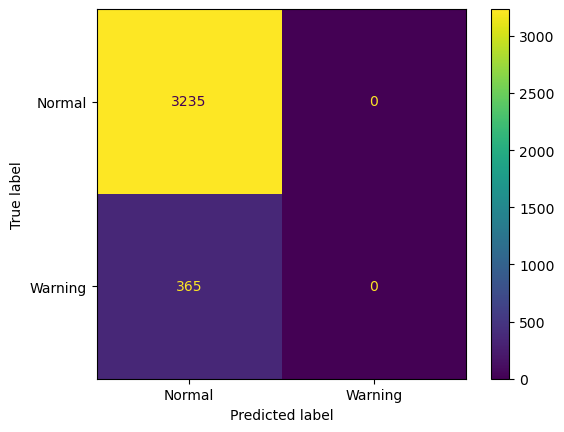

In [12]:
model_lr = LogisticRegression(solver='newton-cg', C=0.01).fit(X_train, y_train)
pred_lr = model_lr.predict(X_test)
lr_cm = confusion_matrix(y_test, pred_lr)
ConfusionMatrixDisplay(lr_cm, display_labels=['Normal', 'Warning']).plot()

Accuracy:	 0.8986111111111111
Precision:	 0.0
Recall:		 0.0
F1 score:	 0.0
ROC AUC score:	 0.7990040439541828


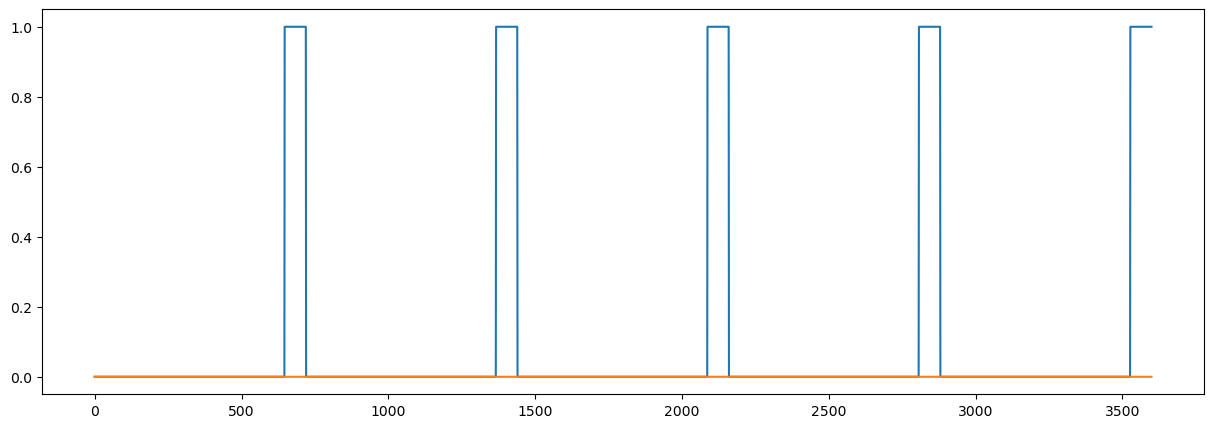

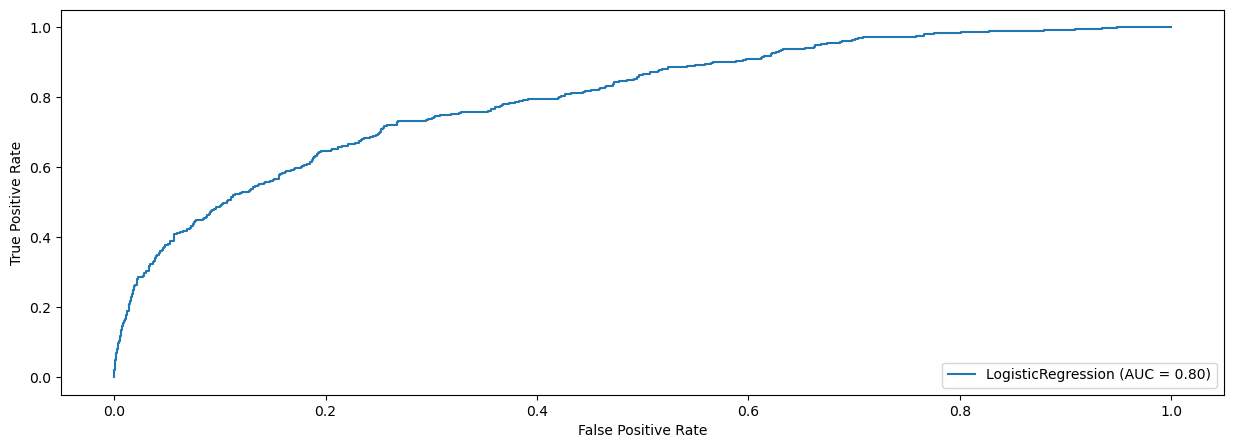

In [90]:
plot_metrics(model_lr, X_test, y_test, pred_lr)

---
# SVM

In [14]:
parameters = {'kernel': ['poly', 'rbf', 'sigmoid'], 'C':[0.001, 0.01, 0.1, 1, 10]}

grid_search = GridSearchCV(svm.SVC(), parameters, verbose=0)
grid_search.fit(X_train, y_train)
grid_df = pd.DataFrame(grid_search.cv_results_['params'])
grid_df['mean_test_score'] = grid_search.cv_results_['mean_test_score']
grid_df['rank'] =  grid_search.cv_results_['rank_test_score']
grid_df.head().sort_values(by='rank').head()

,C,kernel,mean_test_score,rank
3,0.010,poly,0.904398,1
0,0.001,poly,0.899826,2
1,0.001,rbf,0.898611,3
2,0.001,sigmoid,0.898611,3
4,0.010,rbf,0.898611,3


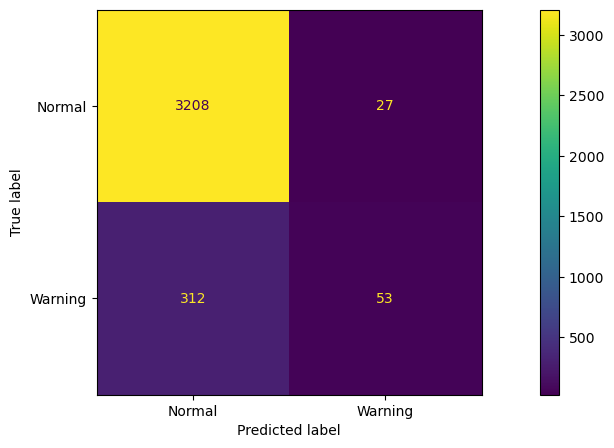

In [15]:
model_svm = svm.SVC(kernel='poly', C=0.01, probability=True).fit(X_train, y_train)
pred_svm = model_svm.predict(X_test)
svm_cm = confusion_matrix(y_test, pred_svm)
ConfusionMatrixDisplay(svm_cm, display_labels=['Normal', 'Warning']).plot()

Accuracy:	 0.9058333333333334
Precision:	 0.6625
Recall:		 0.14520547945205478
F1 score:	 0.23820224719101124
ROC AUC score:	 0.7900726217950075


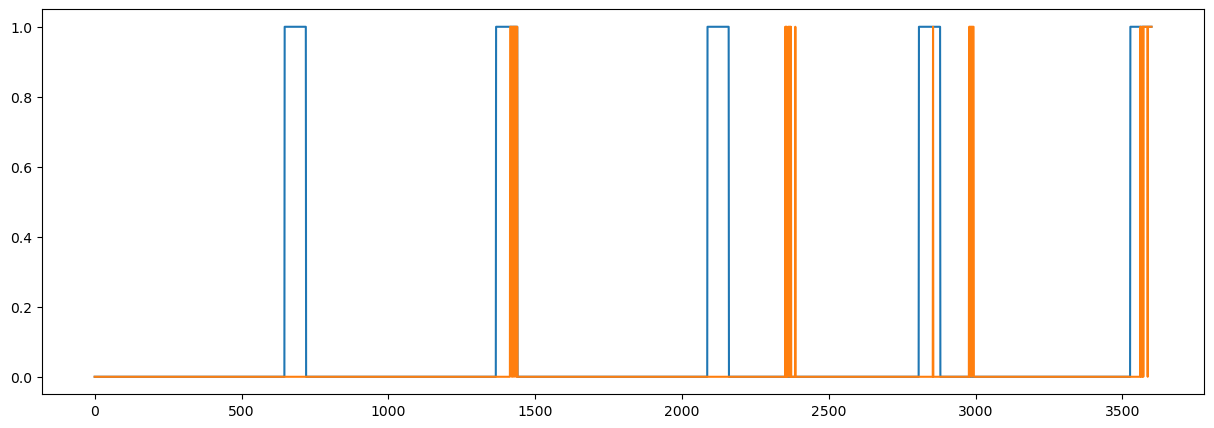

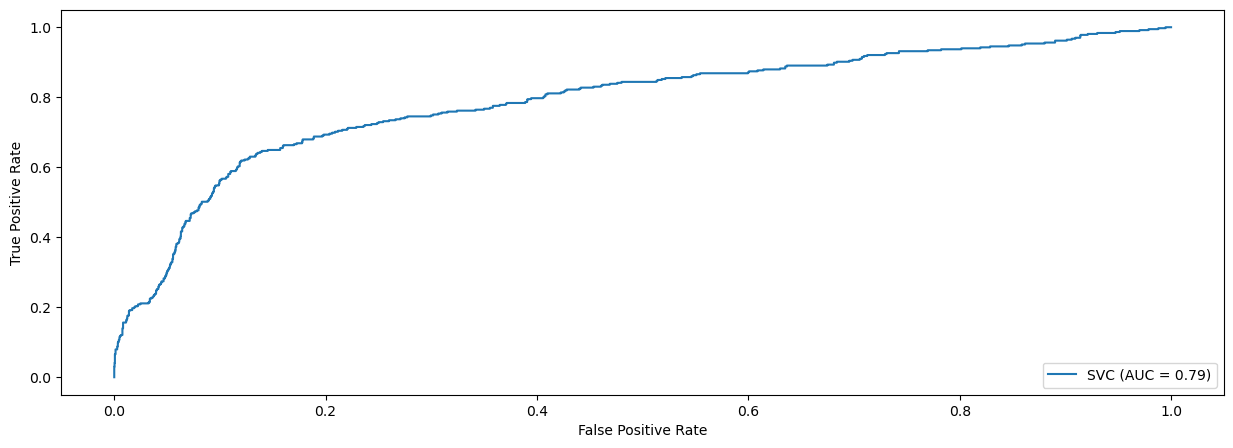

In [91]:
plot_metrics(model_svm, X_test, y_test, pred_svm)

---
# Random Forest Classifier

In [17]:
parameters = {'max_depth': [6,7,8,9,10,11,12], 'n_estimators': [10,50,100,200]}
grid_search = GridSearchCV(RandomForestClassifier(), parameters, verbose=0)
grid_search.fit(X_train, y_train)
grid_df = pd.DataFrame(grid_search.cv_results_['params'])
grid_df['mean_test_score'] = grid_search.cv_results_['mean_test_score']
grid_df['rank'] =  grid_search.cv_results_['rank_test_score']
grid_df.sort_values(by='rank').head()

,max_depth,n_estimators,mean_test_score,rank
0,6,10,0.883275,1
2,6,100,0.882986,2
7,7,200,0.881539,3
3,6,200,0.881366,4
6,7,100,0.879919,5


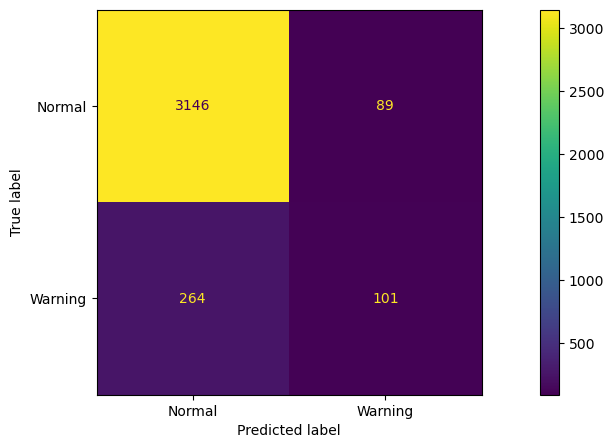

In [17]:
model_rf = RandomForestClassifier(max_depth=6, n_estimators=10).fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)
rf_cm = confusion_matrix(y_test, pred_rf)
ConfusionMatrixDisplay(rf_cm, display_labels=['Normal', 'Warning']).plot()

Accuracy:	 0.9019444444444444
Precision:	 0.531578947368421
Recall:		 0.27671232876712326
F1 score:	 0.3639639639639639
ROC AUC score:	 0.8521936863500666


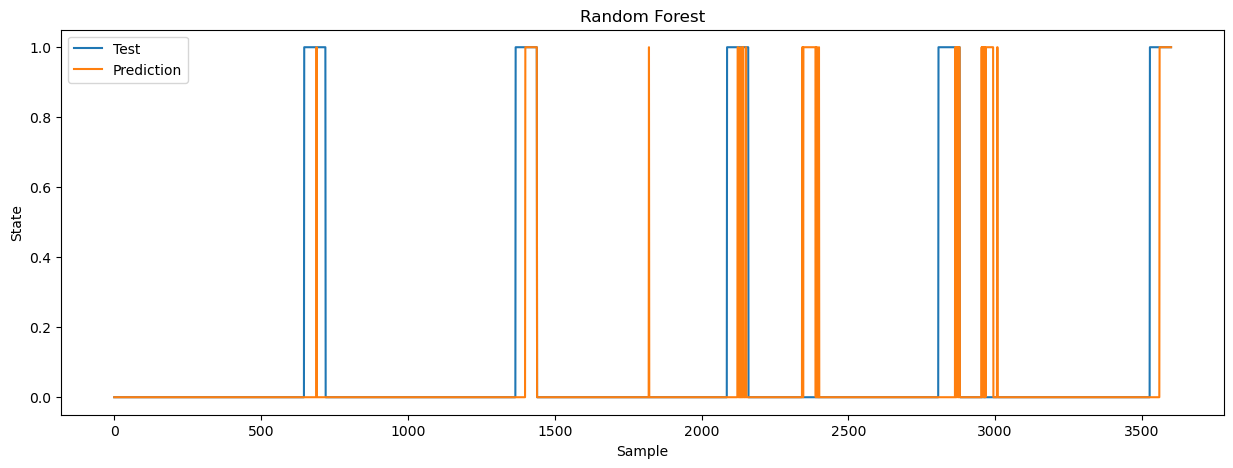

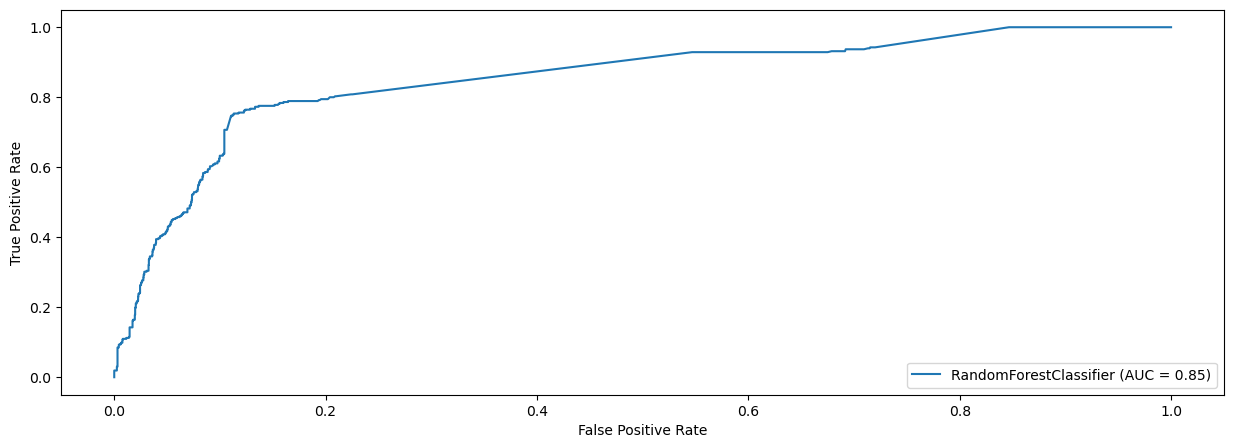

In [98]:
plot_metrics(model_rf, X_test, y_test, pred_rf, 'Random Forest')

---
# Gradient boosting

In [20]:
parameters = {'learning_rate': [0.001, 0.01,0.1,1,2], 'n_estimators': [10,50,100,200]}
grid_search = GridSearchCV(GradientBoostingClassifier(), parameters, verbose=0)
grid_search.fit(X_train, y_train)
grid_df = pd.DataFrame(grid_search.cv_results_['params'])
grid_df['mean_test_score'] = grid_search.cv_results_['mean_test_score']
grid_df['rank'] =  grid_search.cv_results_['rank_test_score']
grid_df.sort_values(by='rank').head()

,learning_rate,n_estimators,mean_test_score,rank
6,0.010,100,0.908275,1
8,0.100,10,0.906192,2
7,0.010,200,0.903009,3
0,0.001,10,0.898611,4
1,0.001,50,0.898611,4


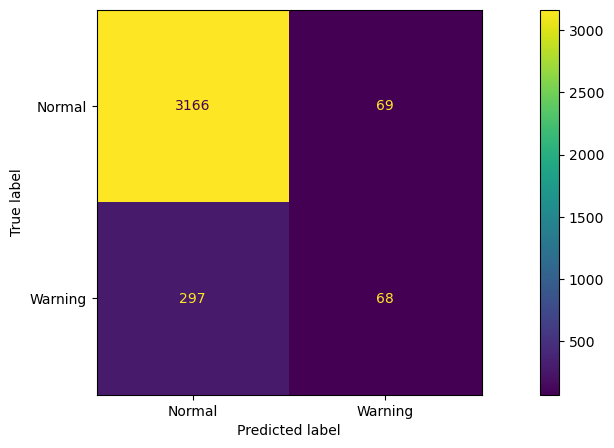

In [21]:
model_gb = GradientBoostingClassifier(learning_rate=0.010, n_estimators=100).fit(X_train, y_train)
pred_gb = model_gb.predict(X_test)
gb_cm = confusion_matrix(y_test, pred_gb)
ConfusionMatrixDisplay(gb_cm, display_labels=['Normal', 'Warning']).plot()

Accuracy:	 0.8983333333333333
Precision:	 0.49635036496350365
Recall:		 0.1863013698630137
F1 score:	 0.2709163346613546
ROC AUC score:	 0.8235298850331352


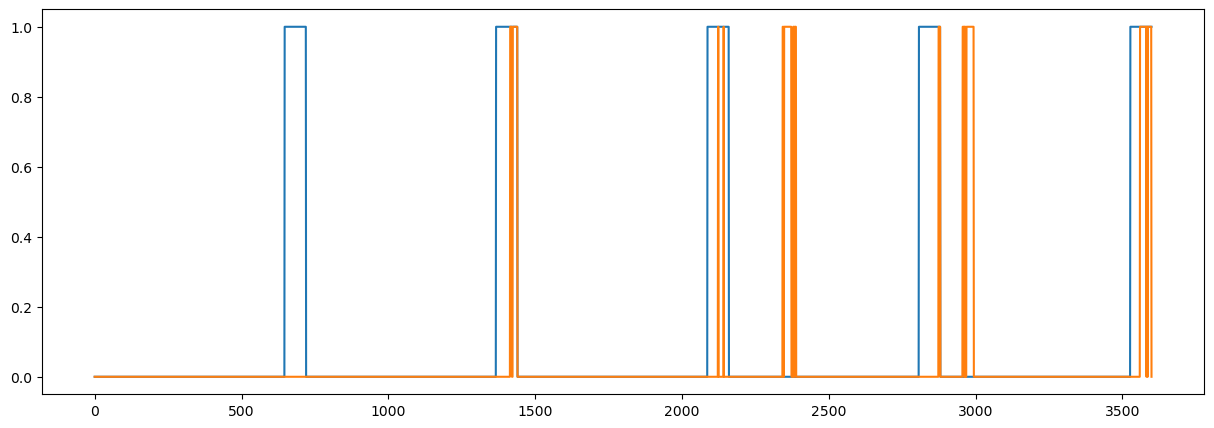

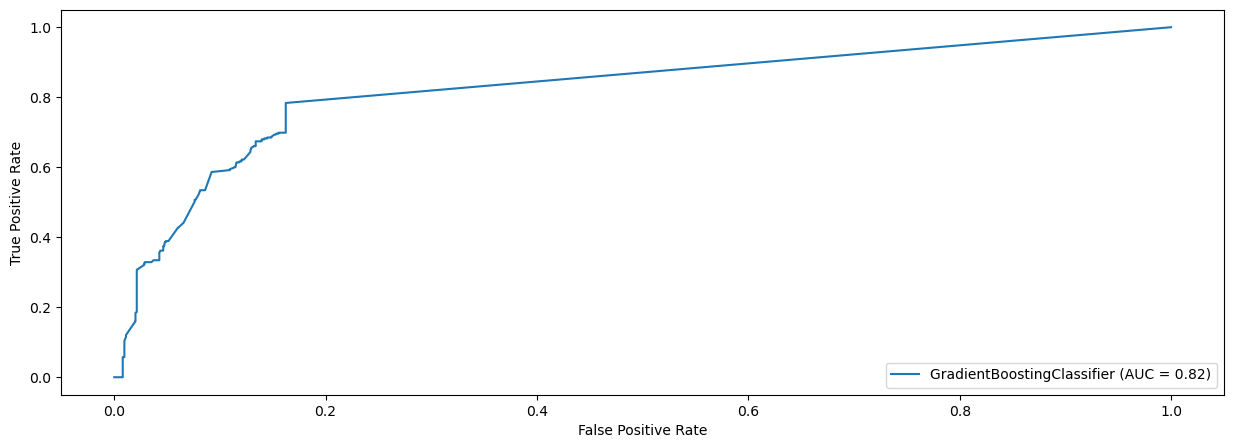

In [93]:
plot_metrics(model_gb, X_test, y_test, pred_gb)

---
# XGBoosting

In [23]:
parameters = {'booster': ['gbtree', 'dart'], 'reg_alpha': [0, 0.5, 1, 5], 'reg_lambda': [0, 0.5, 1, 5], 'eval_metric': ['mlogloss']}
grid_search = GridSearchCV(XGBClassifier(use_label_encoder=False), parameters, verbose=0)
grid_search.fit(X_train, y_train.astype(int))
grid_df = pd.DataFrame(grid_search.cv_results_['params'])
grid_df['mean_test_score'] = grid_search.cv_results_['mean_test_score']
grid_df['rank'] =  grid_search.cv_results_['rank_test_score']
grid_df.sort_values(by='rank').head()

,booster,eval_metric,reg_alpha,reg_lambda,mean_test_score,rank
22,dart,mlogloss,0.5,1.0,0.874306,1
6,gbtree,mlogloss,0.5,1.0,0.874306,1
27,dart,mlogloss,1.0,5.0,0.868229,3
11,gbtree,mlogloss,1.0,5.0,0.868229,3
28,dart,mlogloss,5.0,0.0,0.867650,5


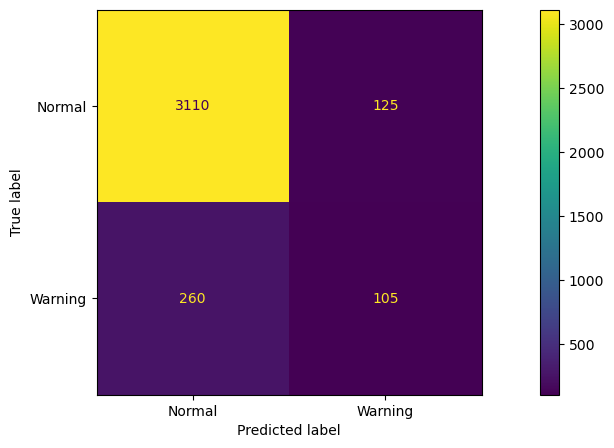

In [23]:
model_xgb = XGBClassifier(booster='dart', reg_alpha=0.5, reg_lambda=1, eval_metric='mlogloss').fit(X_train, y_train.astype(int))
pred_xgb = model_xgb.predict(X_test)
xgb_cm = confusion_matrix(y_test, pred_xgb)
ConfusionMatrixDisplay(xgb_cm, display_labels=['Normal', 'Warning']).plot()

Accuracy:	 0.8930555555555556
Precision:	 0.45652173913043476
Recall:		 0.2876712328767123
F1 score:	 0.3529411764705882
ROC AUC score:	 0.7902123605259256


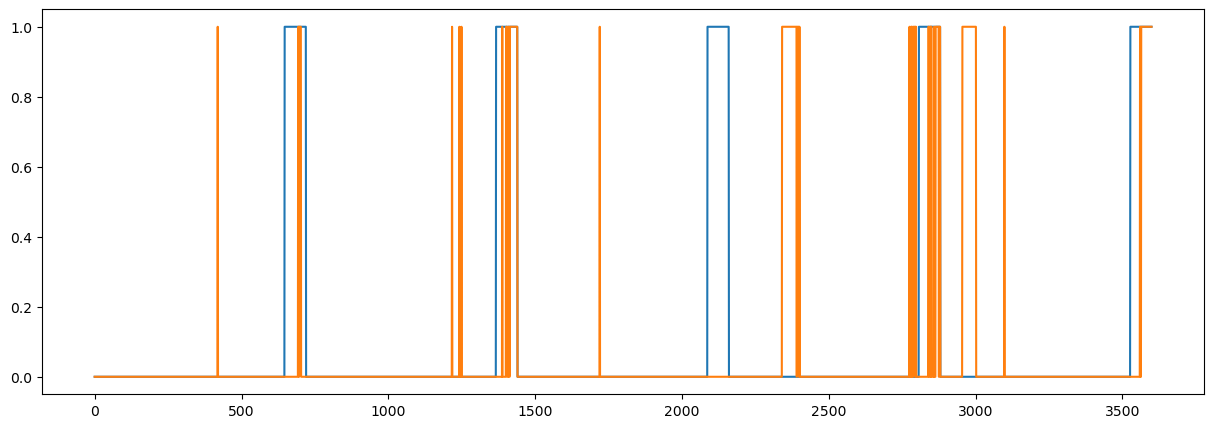

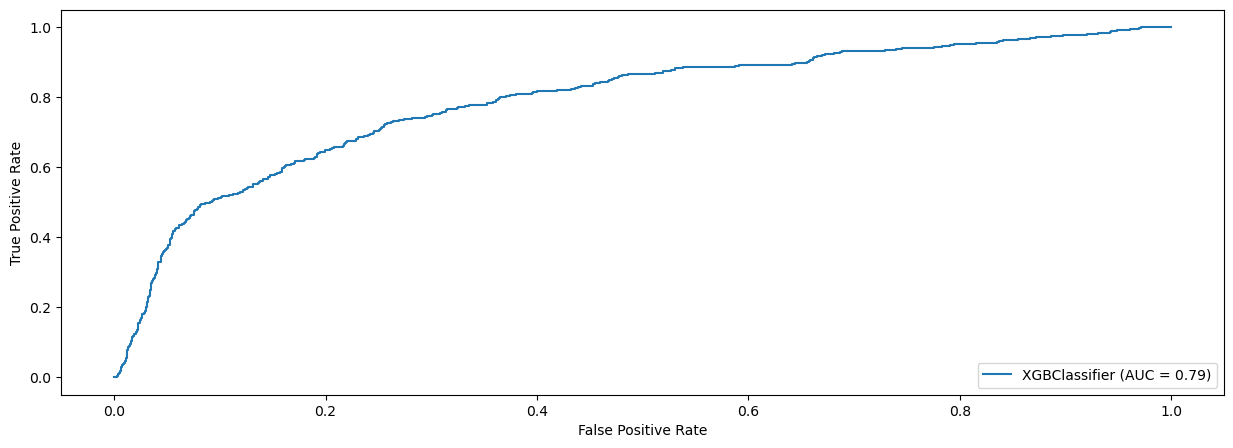

In [94]:
plot_metrics(model_xgb, X_test, y_test, pred_xgb)